**Practical No.2 :-**

**Aim :-Implementation of feature selection techniques.** 

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/diabetes.csv")

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# load data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pd.read_csv(url, names=names)

In [ ]:
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

**Filter Methods**

1.   Information Gain



In [ ]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline

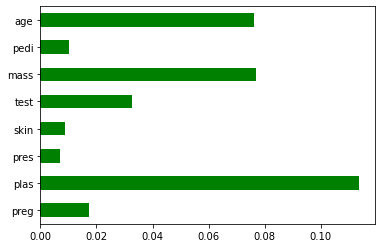

In [ ]:
importances = mutual_info_classif(X, Y)
feat_importances = pd.Series(importances,dataframe.columns[0:len(dataframe.columns) -1])

feat_importances.plot(kind = 'barh', color = 'Green')
plt.show()



2.   Chi-square Test


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
#Convert to categorical data by converting data to integers
X_cat = X.astype(int)

In [ ]:
#Three features with highest chi-squared statistics are selected
chi2_features = SelectKBest(chi2, k = 3)
X_kbest_features = chi2_features.fit_transform(X_cat, Y)

In [ ]:
#Reduced Features
print('Original features number: ', X_cat.shape[1])
print('Reduced features number: ', X_kbest_features.shape[1])

Original features number:  8
Reduced features number:  3




3.   Fisher’s Score



In [ ]:
!pip install skfeature-chappers
from skfeature.function.similarity_based import fisher_score
import matplotlib.pyplot as plt
%matplotlib inline

     |████████████████████████████████| 66 kB 2.7 MB/s 


In [ ]:
# Calculating scores
ranks = fisher_score.fisher_score(X, Y)

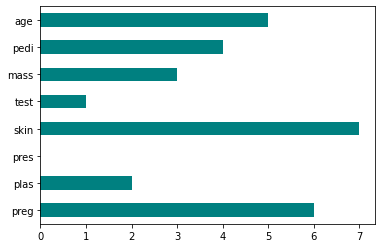

In [ ]:
# Plotting the ranks
feat_importances = pd.Series(ranks,dataframe.columns[0:len(dataframe.columns)-1])

feat_importances.plot(kind = 'barh', color = 'teal')
plt.show()



3.   Correlation Coefficient



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Correlation matrix
cor = dataframe.corr()

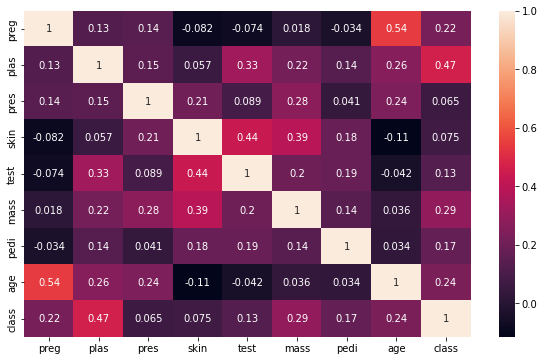

In [ ]:
# Plotting Heatmap
plt.figure(figsize = (10, 6))
sns.heatmap(cor, annot = True)

**Wrapper Methods**





1.   Forward Feature Selection



In [ ]:
# step forward feature selection

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# In practice, feature selection should be done after data pre-processing,
# so ideally, all the categorical variables are encoded into numbers,
# and then you can assess how deterministic they are of the target

# here for simplicity I will use only numerical variables
# select numerical columns:

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(768, 9)

In [ ]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['Age'], axis=1),
    data['Age'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((537, 8), (231, 8))

In [ ]:
# Filling the values 
X_train.fillna(0, inplace=True)

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs1 = SFS(RandomForestRegressor(), 
           k_features=5, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='r2',
           cv=3)

sfs1 = sfs1.fit(np.array(X_train), y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    5.9s finished

[2022-04-09 15:26:13] Features: 1/5 -- score: 0.28979936735105144[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    3.5s finished

[2022-04-09 15:26:17] Features: 2/5 -- score: 0.31953317559980504[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    3.4s finished

[2022-04-09 15:26:20] Features: 3/5 -- score: 0.323613780613838[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1

In [ ]:
# This is the index of our feature
sfs1.k_feature_idx_

(0, 3, 4, 6, 7)

In [ ]:
# These are the top 5 features for our data
X_train.columns[list(sfs1.k_feature_idx_)]

Index(['Pregnancies', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction',
       'Outcome'],
      dtype='object')

2.   Backward Feature Selection



In [ ]:
# step backward feature elimination
sfs1 = SFS(RandomForestRegressor(), 
           k_features=5, 
           forward=False, 
           floating=False, 
           verbose=2,
           scoring='r2',
           cv=3)

sfs1 = sfs1.fit(np.array(X_train), y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    7.9s finished

[2022-04-09 15:28:25] Features: 7/5 -- score: 0.39177583275253697[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    4.6s finished

[2022-04-09 15:28:30] Features: 6/5 -- score: 0.36750650562741366[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    3.7s finished

[2022-04-09 15:28:34] Features: 5/5 -- score: 0.3426895787719973

In [ ]:
sfs1.k_feature_idx_

(0, 1, 3, 6, 7)

In [ ]:
X_train.columns[list(sfs1.k_feature_idx_)]

Index(['Pregnancies', 'Glucose', 'SkinThickness', 'DiabetesPedigreeFunction',
       'Outcome'],
      dtype='object')

**Embedded Methods**

1.   LASSO Regularization (L1)



In [ ]:
#Importing Library
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

In [ ]:
# the features in the house dataset are in very
# different scales, so it helps the regression to scale them

scaler = StandardScaler()
scaler.fit(X_train.fillna(0))

StandardScaler()

In [ ]:
# here, again I will train a Lasso Linear regression and select
# the non zero features in one line.
# bear in mind that the linear regression object from sklearn does
# not allow for regularisation. So If you want to make a regularised
# linear regression you need to import specifically "Lasso"
# that is the l1 version of the linear regression
# alpha is the penalisation here, so I set it high in order
# to force the algorithm to shrink some coefficients

sel_ = SelectFromModel(Lasso(alpha=100))
sel_.fit(scaler.transform(X_train.fillna(0)), y_train)

SelectFromModel(estimator=Lasso(alpha=100))

In [ ]:
sel_.get_support()

array([False, False, False, False, False, False, False, False])

In [ ]:
# make a list with the selected features and print the outputs
selected_feat = X_train.columns[(sel_.get_support())]

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))
print("Total number neglected features = ",X_train.shape[1]-len(selected_feat))

total features: 8
selected features: 0
features with coefficients shrank to zero: 8
Total number neglected features =  8


2.   Random Forest Importance



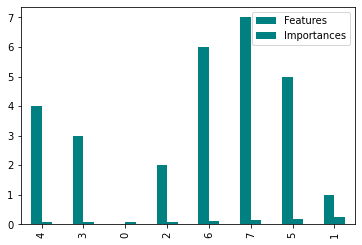

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#create the random forest with your hyperparameters
model = RandomForestClassifier(n_estimators = 340)
#fit the model to start training
model.fit(X, Y)
#get the importance of the resulting features
importances = model.feature_importances_
#create a data frame for visualization
final_df = pd.DataFrame({"Features": pd.DataFrame(X).columns,
"Importances" : importances})

final_df.set_index('Importances')
final_df = final_df.sort_values('Importances')
#plot the feature importances in bars
final_df.plot.bar(color = 'teal')